# Ejercicio 1
Realice un programa que permita el entrenamiento y prueba de un perceptrón simple con una cantidad variable de
entradas. El programa debe proveer las siguientes facilidades:
 1. lectura de los patrones de entrenamiento (entradas y salidas) desde un archivo en formato texto separado por comas
 2. selección del criterio de finalización del entrenamiento,
 3. selección del número máximo de épocas de entrenamiento,
 4. selección de la tasa de aprendizaje,
 5. prueba del perceptrón entrenado mediante archivos de texto con el mismo formato separado por comas.

Realizar la prueba: Recuerde que para que la prueba tenga validez se deben utilizar patrones nunca presentados en el entrenamiento, para esto se dispone de dos archivos diferentes para cada problema.

Implemente una rutina de graficación que permita visualizar, para el caso de dos entradas, los patrones utilizados y
la recta de separación que se va ajustando durante el entrenamiento del perceptrón simple. Utilice dicha rutina para
visualizar el entrenamiento en los problemas OR y XOR.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Train

In [2]:
def perceptron_simple_train(ds_train,N,nu,gamma,N_valid):

    idx=np.random.choice(range(ds_train.shape[0]), ds_train.shape[0], replace = False)
    idx_valid = idx[:N_valid]
    idx_train = idx[N_valid:]

    # inicializacion de pesos al azar: distribución uniforme
    # w = np.random.rand(ds_train.shape[1]) - 0.5

    # inicialización al azar de los pesos con distribución normal
    # loc -> media - scale -> desvío
    w = np.random.normal(loc = 0, scale = 0.15, size = ds_train.shape[1]) 

    error_epocas = []
    w_epocas = w

    x = np.hstack((-1*np.ones((ds_train.shape[0],1)), ds_train))


    # épocas
    for i in range(N):
        for patron in x[idx_train]:
            a = patron
            # producto punto
            y = np.dot(patron[:-1],w)
            # No linealidad
            if (y > 0):
                y = 1
            else:
                y = -1
            # Actualización de pesos
            w = w + patron[:-1] * gamma * (patron[-1] - y)

        # Validación
        errores = 0
        for j in x[idx_valid]:
            # producto punto
            y = np.dot(j[0:len(j)-1],w)
            
            # No linealidad
            if (y > 0 and 1 != j[len(j)-1]):
                errores += 1
            elif (y <= 0 and -1 != j[len(j)-1]):
                errores += 1
        error = (errores/N_valid)

        error_epocas= np.append(error_epocas, [error])
        w_epocas = np.vstack((w_epocas, w))
        
        # print(f'Epoca {i}: error = {error}, w = {w}')
        if (error < nu):
            print(f'Época {i}')
            return w_epocas, error_epocas
    print(f'Época {i}')
    return w_epocas, error_epocas

In [3]:
import numpy as np
np.vstack(([2, 3], [1, 2]))

array([[2, 3],
       [1, 2]])

## Test

In [4]:
def perceptron_test(ds_test,w):
    errores = 0
    for j in ds_test:
        j = np.concatenate([[-1], j])
        # Convolución
        y = np.dot(j[0:len(j)-1],w)
        # No linealidad
        if (y > 0 and 1 != j[len(j)-1]):
            errores += 1
        elif (y <= 0 and -1 != j[len(j)-1]):
            errores += 1
    return (errores/ds_test.shape[0])


## Graficación

Implemente una rutina de graficación que permita visualizar, para el caso de dos entradas, los patrones utilizados y
la recta de separación que se va ajustando durante el entrenamiento del perceptrón simple. Utilice dicha rutina para
visualizar el entrenamiento en los problemas OR y XOR.

In [5]:
import time
import matplotlib.animation as animation

In [6]:
def graficar(x, y, x_color, w_vec, error):
    
    N_epocas = w_vec.shape[0]
    x_recta = np.arange(-3, 3, 0.01)
    pendiente = -w_vec[0,1]/w_vec[0,2]
    ordenada = w_vec[0,0]/w_vec[0,2]
    recta =  ordenada + pendiente * x_recta
    fig, ax = plt.subplots(figsize=(4,3))
    line1, = ax.plot(x_recta, recta)
    ax.grid()
    ax.scatter(x, y, c = x_color)
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])

    def animate(i):
        pendiente = -w_vec[i,1]/w_vec[i,2]
        ordenada = w_vec[i,0]/w_vec[i,2]
        recta =  ordenada + pendiente * x_recta
        line1.set_ydata(recta)
        plt.title(f'recta = {np.round(pendiente, 4)}x + {np.round(ordenada,4)}, error: {error[i]}')
        time.sleep(0.2)
        return line1,
    
    anim = animation.FuncAnimation(fig, animate, frames=(N_epocas), interval=20, repeat=False)
    plt.show()
    #pause
    anim.event_source.stop()



## Problema OR
### Train

In [7]:
# lectura de patrones

ds_train = np.genfromtxt('icgtp1datos/OR_trn.csv', delimiter=',')
ds_train_size = ds_train.shape[0]

# Entrenamiento
N = 50 # Epocas
gamma = 0.00001 # Tasa de aprendizaje
nu = 0.0005 # Umbral de error
N_valid = 200
historial_w, errores_evol = perceptron_simple_train(ds_train,N,nu,gamma,N_valid)



Época 2


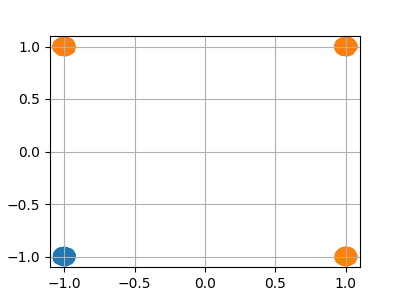

In [8]:
# Gráfico evolución del entrenamiento

x_x = ds_train[:,0]
x_y = ds_train[:,1]
x_color = np.where(x_x < 0, np.where(x_y < 0, 'C0', 'C1'), 'C1')
%matplotlib widget
graficar(x_x, x_y, x_color, historial_w, errores_evol)


In [9]:
%matplotlib inline

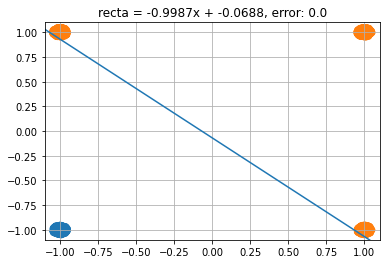

In [10]:
x_recta = np.arange(-3, 3, 0.01)
pendiente = -historial_w[-1,1]/historial_w[-1,2]
ordenada = historial_w[-1,0]/historial_w[-1,2]
recta =  ordenada + pendiente * x_recta

plt.figure()
plt.plot(x_recta, recta)
plt.grid()

x_color = np.where(ds_train[:,0] < 0, np.where(ds_train[:,1] < 0, 'C0', 'C1'), 'C1')
plt.scatter(ds_train[:,0], ds_train[:,1], c = x_color)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.title(f'recta = {np.round(pendiente, 4)}x + {np.round(ordenada,4)}, error: {errores_evol[-1]}')

plt.show()

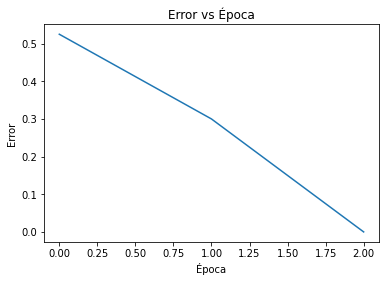

In [11]:
# Gráfico de error vs. época para el train

plt.close('all')
plt.title('Error vs Época')
plt.xlabel('Época')
plt.ylabel('Error')
plt.plot(range(len(errores_evol)),errores_evol)
plt.show()

### Test

In [12]:
# Test

ds_test = np.genfromtxt('icgtp1datos/OR_tst.csv', delimiter=',')
ds_test_size = ds_test.shape[0]

w = historial_w[-1]
error = perceptron_test(ds_test,w)
print(f'Error de test: {error}')


Error de test: 0.0


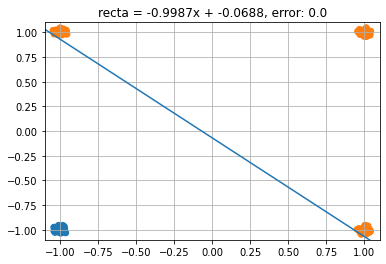

In [13]:
x_recta = np.arange(-3, 3, 0.01)
pendiente = -w[1]/w[2]
ordenada = w[0]/w[2]
recta =  ordenada + pendiente * x_recta

plt.figure()
plt.plot(x_recta, recta)
plt.grid()

x_color = np.where(ds_test[:,0] < 0, np.where(ds_test[:,1] < 0, 'C0', 'C1'), 'C1')
plt.scatter(ds_test[:,0], ds_test[:,1], c = x_color)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.title(f'recta = {np.round(pendiente, 4)}x + {np.round(ordenada,4)}, error: {error}')

plt.show()

## Problema XOR
### Train

In [14]:
# Lectura de patrones

ds_train = np.genfromtxt('icgtp1datos/XOR_trn.csv', delimiter=',')
ds_train_size = ds_train.shape[0]

# Entrenamiento
N = 50 # Epocas
gamma = 0.001 # Tasa de aprendizaje
nu = 0.3 # Umbral de error
N_valid=200
historial_w, errores_evol = perceptron_simple_train(ds_train,N,nu,gamma,N_valid)

Época 0


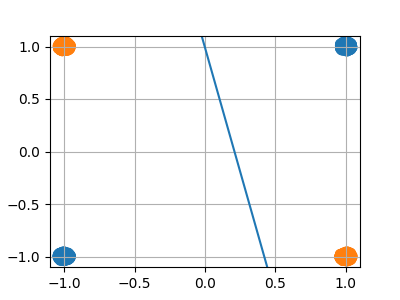

In [15]:
# Gráfico de evolución del entrenamiento

x_x = ds_train[:,0]
x_y = ds_train[:,1]
x_color = np.where(x_x > 0, np.where(x_y > 0, 'C0', 'C1'), np.where(x_y < 0, 'C0', 'C1'))
%matplotlib widget
graficar(x_x, x_y, x_color, historial_w, errores_evol)

In [16]:
%matplotlib inline

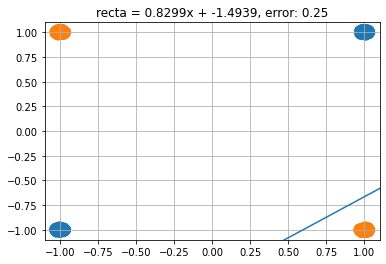

In [17]:
x_recta = np.arange(-3, 3, 0.01)
pendiente = -historial_w[-1,1]/historial_w[-1,2]
ordenada = historial_w[-1,0]/historial_w[-1,2]
recta =  ordenada + pendiente * x_recta

plt.figure()
plt.plot(x_recta, recta)
plt.grid()
x_color = np.where(ds_train[:,0] > 0, np.where(ds_train[:,1] > 0, 'C0', 'C1'), np.where(ds_train[:,1] < 0, 'C0', 'C1'))
plt.scatter(ds_train[:,0], ds_train[:,1], c = x_color)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.title(f'recta = {np.round(pendiente, 4)}x + {np.round(ordenada,4)}, error: {errores_evol[-1]}')

plt.show()

### Test

In [18]:
ds_test = np.genfromtxt('icgtp1datos/XOR_tst.csv', delimiter=',')
ds_test_size = ds_test.shape[0]

# Test
w = historial_w[-1]
error = perceptron_test(ds_test,w)
print(f'Error de test: {error}')

Error de test: 0.26


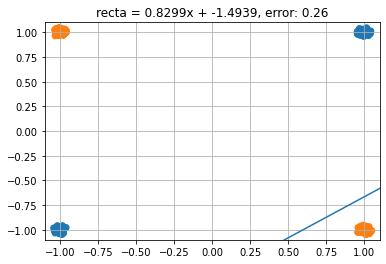

In [19]:
x_recta = np.arange(-3, 3, 0.01)
pendiente = -w[1]/w[2]
ordenada = w[0]/w[2]
recta =  ordenada + pendiente * x_recta

plt.figure()
plt.plot(x_recta, recta)
plt.grid()

x_color = np.where(ds_test[:,0] > 0, np.where(ds_test[:,1] > 0, 'C0', 'C1'), np.where(ds_test[:,1] < 0, 'C0', 'C1'))
plt.scatter(ds_test[:,0], ds_test[:,1], c = x_color)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.title(f'recta = {np.round(pendiente, 4)}x + {np.round(ordenada,4)}, error: {error}')

plt.show()

# Ejercicio 2
## Generación de particiones

In [20]:
def generar_particiones(filename, n, p_test):
    ds = np.genfromtxt(filename, delimiter=',')
    n_test = int(ds.shape[0] * p_test)
    n_train = ds.shape[0] - n_test
    M_test = np.zeros((n,n_test),dtype = int)
    M_train = np.zeros((n, n_train),dtype = int)

    for i in range(n):
        idx=np.random.choice(range(ds.shape[0]),ds.shape[0],replace = False)
        idx_test = idx[0:n_test]
        idx_train = idx[n_test:ds.shape[0]]
        M_test[i] = idx_test
        M_train[i] = idx_train
    
    return (ds, M_test, M_train)


## Validación cruzada con 5 particiones
El archivo $spheres1d10.csv$ contiene una serie de datos generados a partir de los valores de la Tabla 1, con pequeñas desviaciones aleatorias ($< 10 %$) en torno a ellos. 
Realice con estos datos la validación cruzada del perceptrón simple con $5$ particiones de entrenamiento y prueba con relacion $80/20$

Época 5
Época 0
Época 0
Época 27
Época 34


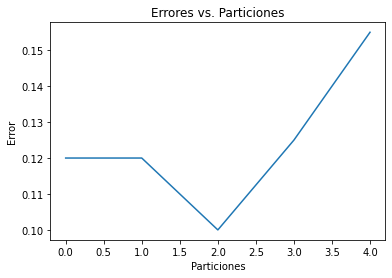

In [21]:
num_particiones=5
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres1d10.csv', num_particiones, 0.2)

# for i in range(num_particiones):
#     np.savetxt(f'icgtp1datos\spheres1d10-part{i}_test.csv', ds[M_tst[i]], delimiter=',')
#     np.savetxt(f'icgtp1datos\spheres1d10-part{i}_trn.csv', ds[M_trn[i]], delimiter=',')

ds_size = ds.shape[0]

w_particion=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    historial_w, errores_evol = perceptron_simple_train(ds[particion],50,0.13,0.01,500)
    w_particion[i] = historial_w[-1]

errores=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores[i]= perceptron_test(ds[particion],w_particion[i])

plt.close('all')
plt.plot(range(num_particiones),errores)
plt.title('Errores vs. Particiones')
plt.xlabel('Particiones')
plt.ylabel('Error')
plt.show()

## Validación cruzada con 10 particiones
A partir de la misma tabla del ejemplo anterior, pero modificando el punto x = [−1 + 1 −1] → yd = 1, se ha generado un conjunto de datos diferente. Los archivos spheres2d10.csv, spheres2d50.csv y spheres2d70.csv contienen los datos con desviaciones aleatorias de 10, 50 y 70 % respectivamente (Figuras 2(b), 2(c) y 2(d)). 

Realice la validación cruzada del perceptrón simple con 10 particiones de entrenamiento y prueba, con relación 80/20.


In [22]:
num_particiones=10
#particion de 10% de desvio
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres2d10.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion_2d10=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    historial_w, errores_evol = perceptron_simple_train(ds[particion],20,0.03,0.001,500)                       
    w_particion_2d10[i]= historial_w[-1]

errores_2d10=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores_2d10[i]= perceptron_test(ds[particion],w_particion_2d10[i])

#particion de 50% de desvio
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres2d50.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion_2d50=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    historial_w, errores_evol = perceptron_simple_train(ds[particion],40,0.05,0.0001,500)                       
    w_particion_2d50[i]= historial_w[-1]


errores_2d50=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores_2d50[i]= perceptron_test(ds[particion],w_particion_2d50[i])

#particion de 70% de desvio
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres2d70.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion_2d70=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    historial_w, errores_evol = perceptron_simple_train(ds[particion],100,0.05,0.1,500)                       
    w_particion_2d70[i] = historial_w[-1]


errores_2d70=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores_2d70[i]= perceptron_test(ds[particion],w_particion_2d70[i])

Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 1
Época 1
Época 1
Época 2
Época 0
Época 1
Época 1
Época 0
Época 1
Época 1
Época 0
Época 0
Época 0
Época 1
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0


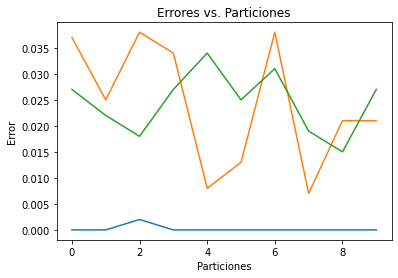

In [23]:
plt.close('all')
plt.plot(range(num_particiones),errores_2d10)
plt.plot(range(num_particiones),errores_2d50)
plt.plot(range(num_particiones),errores_2d70)
plt.title('Errores vs. Particiones')
plt.xlabel('Particiones')
plt.ylabel('Error')
plt.show()

In [24]:
print(f'media desviación 10%: {np.mean(errores_2d10):.4f} - desvío: {np.std(errores_2d10):.4f}')
print(f'media desviación 50%: {np.mean(errores_2d50):.4f} - desvío: {np.std(errores_2d50):.4f}')
print(f'media desviación 70%: {np.mean(errores_2d70):.4f} - desvío: {np.std(errores_2d70):.4f}')

media desviación 10%: 0.0002 - desvío: 0.0006
media desviación 50%: 0.0242 - desvío: 0.0116
media desviación 70%: 0.0245 - desvío: 0.0057


# Ejercicio 3

In [25]:
def sigmoidea(x):
    return np.divide(2, (1 + np.exp(-x))) - 1

In [26]:
class layer:
    def __init__(self, n_neuron, n_x):
        self.n_neuron = n_neuron
        self.n_entradas = n_x
        self.w = np.random.normal(loc = 0, scale = 0.15, size =(n_neuron,n_x))
        
    def calculate_y(self,x):
        y = np.dot(self.w,x.T)
        y = sigmoidea(y)
        return y   


In [27]:
def perceptron_multilayer_init(neurons_perLayer, n_x):
    network=[]
    aux_n_x = n_x
    for i in range(neurons_perLayer.shape[0]):
        network.append(layer(neurons_perLayer[i], aux_n_x + 1))
        aux_n_x = neurons_perLayer[i]
    return(network)

In [28]:
def perceptron_multilayer_forward(network,x):
    # completa la primera capa
    y=[x]
    for i in range(len(network)):
        y.append( \
                network[i].calculate_y( \
                    np.hstack((-1, y[i]))\
                        )\
        )
    return y

In [29]:
def perceptron_multilayer_backward(network,y,yd):
    e=np.sum(((y[-1]-yd)**2))
    grad=[]
    grad.append(np.multiply(e,np.multiply((1+y[-1]),(1-y[-1]))))
    for i in range(len(network)-1,0,-1):
        w_t=network[i].w[:,1:].T
        grad.append(np.multiply(np.dot(w_t,grad[i-1]),np.multiply((1+y[i]),(1-y[i]))))
    return grad


In [30]:
def perceptron_multilayer_update(network,y,grad,gamma):
    for i in range(len(network)):
        w_new = gamma * np.outer(grad[-(i+1)],np.hstack((-1, y[i])))
        network[i].w += w_new
    return network 

## Train

In [44]:
ds, M_tst, M_trn  =  generar_particiones('icgtp1datos\XOR_trn.csv', 1, 0.2)
X = ds[M_trn[0,:], :-1]
# print(X)
Y_d = ds[M_trn[0,:], -1]
# print(Y_d)
network = []
# X = np.hstack((-1, np.ones((X.shape[0],1)), X))
n_per_layer = np.array([2, 1])
network = perceptron_multilayer_init(n_per_layer, X.shape[1])
cant_epocas = 500
nu_error = 0.5
error_epocas = []
gamma_aprend = 0.01

for n_epoch in range(cant_epocas):
    for i, pattern in enumerate(X):
        y = perceptron_multilayer_forward(network, pattern)
        grad = perceptron_multilayer_backward(network, y, Y_d[i])
        network = perceptron_multilayer_update(network, y, grad, gamma_aprend)
    
    # Validación [con todos los patrones]
    errores = 0
    for n, patron in enumerate(X):
        # producto punto
        y_test = perceptron_multilayer_forward(network, patron)
        # estamos suponiendo una sola salida
        y = -1 if (y_test[-1] < 0) else 1
        # print('y',y,'yDeseada',Y_d[n])
        errores += int(y != Y_d[n])
        # print('errores', errores)
    error = (errores/X.shape[0])
        # error = np.sum(((y[-1]-Y_d[i])**2))        
    error_epocas= np.append(error_epocas, [error])
    print(f'Epoca {n_epoch}: error = {error}')
    if (error < nu_error):
        print(f'Época {n_epoch}')
        break
    print(f'Época {n_epoch}')



Epoca 0: error = 0.506875
Época 0
Epoca 1: error = 0.506875
Época 1
Epoca 2: error = 0.506875
Época 2
Epoca 3: error = 0.506875
Época 3
Epoca 4: error = 0.506875
Época 4
Epoca 5: error = 0.506875
Época 5
Epoca 6: error = 0.506875
Época 6
Epoca 7: error = 0.506875
Época 7
Epoca 8: error = 0.506875
Época 8
Epoca 9: error = 0.506875
Época 9
Epoca 10: error = 0.506875
Época 10
Epoca 11: error = 0.506875
Época 11
Epoca 12: error = 0.506875
Época 12
Epoca 13: error = 0.506875
Época 13
Epoca 14: error = 0.506875
Época 14
Epoca 15: error = 0.506875
Época 15
Epoca 16: error = 0.506875
Época 16
Epoca 17: error = 0.506875
Época 17
Epoca 18: error = 0.506875
Época 18
Epoca 19: error = 0.506875
Época 19
Epoca 20: error = 0.506875
Época 20
Epoca 21: error = 0.506875
Época 21
Epoca 22: error = 0.506875
Época 22
Epoca 23: error = 0.506875
Época 23
Epoca 24: error = 0.506875
Época 24
Epoca 25: error = 0.506875
Época 25
Epoca 26: error = 0.506875
Época 26
Epoca 27: error = 0.506875
Época 27
Epoca 28: er

KeyboardInterrupt: 

## Test

In [32]:
X_test = ds[M_tst[0,:], :-1]
Y_d_test = ds[M_tst[0,:], -1]
errores = 0

for i, pattern in enumerate(X_test):
    y_test = perceptron_multilayer_forward(network, pattern)
    # estamos suponiendo una sola salida
    y = -1 if (y_test[-1] < 0) else 1
    errores += int(y != Y_d_test[i])

print(errores / X_test.shape[0])



0.49


## Plot: hay que corregir, solo copie y pegue

NameError: name 'fc1' is not defined

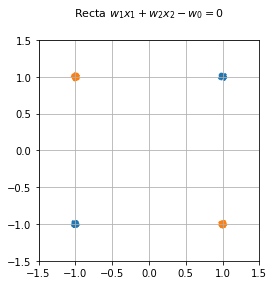

In [33]:
fig1 = plt.figure(figsize=(5, 4), tight_layout=True)
fig1.suptitle('Recta $w_1 x_1 + w_2 x_2 - w_0 = 0$',  fontsize=11)
fig1_ax = fig1.add_subplot(autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
fig1_ax.set_aspect('equal')
fig1_ax.grid()

# Patrones
x_x = X_test[:,0]
x_y = X_test[:,1]
x_color = np.where(x_x > 0, np.where(x_y > 0, 'C0', 'C1'), np.where(x_y < 0, 'C0', 'C1'))
fig1_ax.scatter(x_x, x_y, c=x_color, s=5, marker='.')

# Recta
xx = np.arange(-3, 3, 0.01)
a1 = fc1.W[0,0] / fc1.W[0,2]
b1 = fc1.W[0,1] / fc1.W[0,2]
fig1_ax.plot(xx, a1 - b1 * xx, c='C3', linewidth=2)

a2 = fc1.W[1,0] / fc1.W[1,2]
b2 = fc1.W[1,1] / fc1.W[1,2]
fig1_ax.plot(xx, a2 - b2 * xx, c='C3', linewidth=2)

fig1.show()